<a href="https://colab.research.google.com/github/Valerdzm/AI_Aug---Dec-2024/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 7.- CNN**

Name: Valeria Rodríguez Morales

ID number: 2000303

Class time: Thursday N4-N6

**Step 1: Load libraries**

In [ ]:
# Libraries for data handling and preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Libraries for the MNIST dataset and CNN model creation
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Set a seed for reproducibility
np.random.seed(42)

**Step 2: Load data**

In [ ]:
# Load the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Check the shape of the data
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


**Step 3: Data preprocessing**

In [ ]:
# Reshape the data to include a single channel (grayscale)
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1).astype('float32')
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1).astype('float32')

# Normalize the data to the range [0, 1]
train_data /= 255.0
test_data /= 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

**Step 4: Model selection and training**

In [ ]:
# Initialize the Convolutional Neural Network (CNN)
model = Sequential()

# Add convolutional layers, pooling, and a fully connected output layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8944 - loss: 0.3370 - val_accuracy: 0.9813 - val_loss: 0.0636
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9853 - loss: 0.0473 - val_accuracy: 0.9873 - val_loss: 0.0460
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9900 - val_loss: 0.0369
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9899 - val_loss: 0.0373
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9946 - loss: 0.0165 - val_accuracy: 0.9893 - val_loss: 0.0413
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9901 - val_loss: 0.0413
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9964 - loss: 0.0093 - val_accuracy: 0.9906 - val_loss: 0.0377
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9975 -

In [ ]:
#Structure of CNN
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

**Step 5: Model testing**

Test Accuracy: 0.9915
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


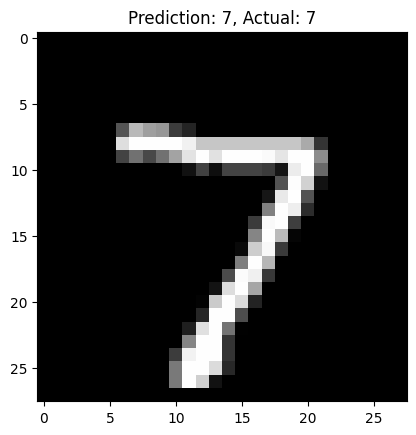

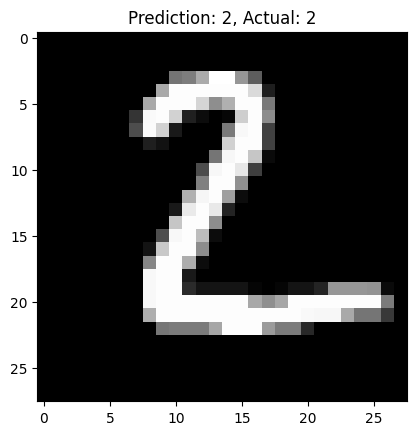

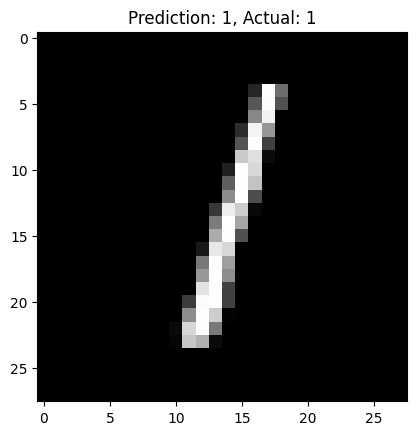

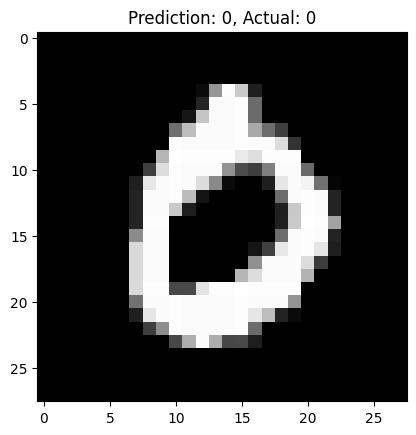

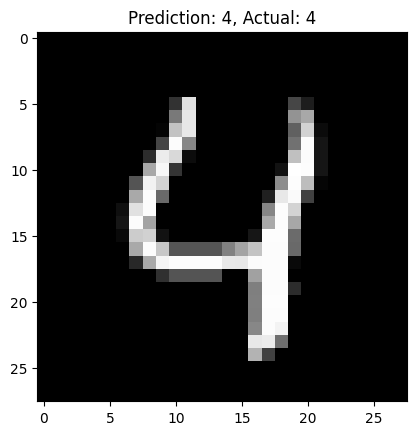

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict using the test data
predictions = model.predict(test_data)

# Display 5 sample predictions along with the actual values
for i in range(5):
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(predictions[i])}, Actual: {np.argmax(test_labels[i])}")
    plt.show()

**Question 1: How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?**

In this assignment, I am using 10 epochs, the duplicated value from the past assignment, with a batch size of 32. So, I used 5 more epochs than the past task.

**Question 2: Did you get a better performance on this assignment or on assignment 6? Why?**

I got a better performance during this assignment, I think because of the epochs and batch sizes; also, because CNNs are better suited for image data since they leverage spatial information with convolutional layers, feedforward networks lack this spatial awareness, leading to poorer performance on image datasets like MNIST.